In [107]:
import numpyro
import numpy as np
import pandas as pd
import seaborn as sns
import jax.numpy as jnp
import jax.scipy as jsp
import matplotlib.pyplot as plt
import numpyro.distributions as dist
from jax import random
from numpyro.infer import MCMC, NUTS, DiscreteHMCGibbs
from utils import select_columns, samples_to_df, df_to_samples, plot_ESS, plot_GR, plot_posterior

numpyro.set_platform("cpu")
numpyro.set_host_device_count(32)

df_bird = pd.read_csv("../data/breedingBirdData.csv")
df_butterfly = pd.read_csv("../data/butterflyData.csv")

display(df_bird)
display(df_butterfly)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
Ardea.herodias,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Butorides.virescens,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Cathartes.aura,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
Coragyps.atratus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Buteo.lineatus,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Icterus.spurius,0,1,0,1,2,0,0,0,0,0,...,0,0,0,0,0,1,0,7,4,0
Carduelis.tristis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
Passer.domesticus,0,0,0,10,8,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Accipiter.striatus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
Aglais.urticae,0,0,1,0,1,2,1,0,1,1,2,0,3,2,1,1,1,0,2,0
Aphantopus.hyperantus,14,10,13,15,3,9,7,17,1,11,11,15,15,6,0,10,15,5,11,6
Argynnis.paphia,0,0,2,4,1,1,0,5,0,0,0,2,2,0,0,0,1,3,1,1
Aricia.artaxerxes,0,1,0,4,0,0,0,0,0,2,2,0,0,0,0,2,1,0,0,0
Aricia.eumedon,0,3,1,4,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
Brenthis.ino,0,1,1,1,0,0,1,1,0,0,3,0,0,0,0,0,0,1,0,0
Clossiana.selene,11,5,11,15,6,8,6,12,0,4,12,9,8,0,0,2,5,5,1,2
Coenonympha.arcania,12,14,9,11,6,11,10,14,2,9,11,13,13,5,2,13,15,10,7,4
Coenonympa.pamphilus,3,4,3,1,4,3,3,1,5,2,4,6,9,8,1,7,7,2,2,0
Polyommatus.semiargus,8,2,5,3,1,3,0,5,0,4,7,6,10,4,0,6,5,3,2,1


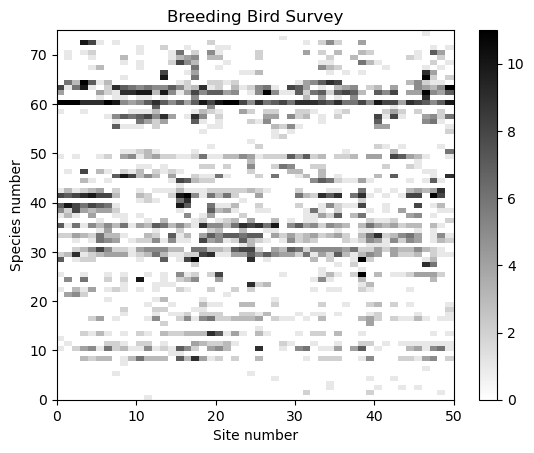

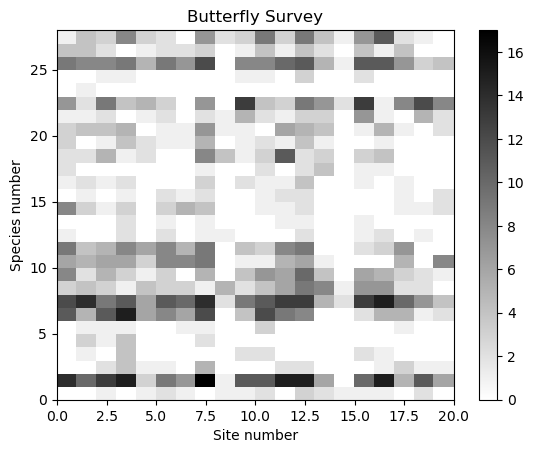

In [108]:
num_chains = 20
num_warmup = num_samples = 1000

J_bird = len(df_bird.columns)
K_bird = 11
x_bird = df_bird.to_numpy()
n_bird = len(df_bird.index)
S_bird = 150
data_bird = {"J": J_bird, "K": K_bird, "n": n_bird, "x": x_bird, "S": S_bird}

J_butterfly = len(df_butterfly.columns)
K_butterfly = 18
n_butterfly = len(df_butterfly.index)
x_butterfly = df_butterfly.to_numpy()
S_butterfly = 50
data_butterfly = {"J": J_butterfly, "K": K_butterfly, "n": n_butterfly, "x": x_butterfly, "S": S_butterfly}

plt.pcolor(x_bird, cmap="binary")
plt.colorbar()
plt.xlabel("Site number")
plt.ylabel("Species number")
plt.title("Breeding Bird Survey")
plt.show()

plt.pcolor(x_butterfly, cmap="binary")
plt.colorbar()
plt.xlabel("Site number")
plt.ylabel("Species number")
plt.title("Butterfly Survey")
plt.show()

In [115]:
def inv_logit(x: jnp.ndarray) -> jnp.ndarray:
    return 1 / (1 + jnp.exp(-x))

def cov_matrix_2d(sigma: jnp.ndarray, rho: float) -> jnp.ndarray:
    return jnp.array([[sigma[0] ** 2, rho * sigma[0] * sigma[1]],
                      [rho * sigma[0] * sigma[1], sigma[1] ** 2]])

def model_centered(J: int, K: int, n: int, x: jnp.ndarray, S: int) -> None:
    alpha = numpyro.sample("alpha", dist.Cauchy(0, 2.5))
    beta = numpyro.sample("beta", dist.Cauchy(0, 2.5))
    sigma_uv = numpyro.sample("sigma_uv", dist.LogNormal(0, 1).expand((2,)).to_event(1))
    rho_uv = numpyro.sample("rho_uv", dist.Uniform(-1, 1))
    Sigma = numpyro.deterministic("Sigma", cov_matrix_2d(sigma_uv, rho_uv))
    Omega = numpyro.sample("Omega", dist.Uniform(0, 1))
    x = jnp.pad(x, [[0, S-len(x)], [0, 0]]).T

    with numpyro.plate("plate_S", S):
        uv = numpyro.sample("uv", dist.MultivariateNormal(jnp.array([alpha, beta]), Sigma))
        logit_psi = numpyro.deterministic("logit_psi", uv[..., 0])
        logit_theta = numpyro.deterministic("logit_theta", uv[..., 1])
        omega = numpyro.sample("omega", dist.Bernoulli(probs=Omega), infer={"enumerate": "parallel"})
        with numpyro.plate("plate_J", J):
            z = numpyro.sample("z", dist.Bernoulli(logits=logit_psi), infer={"enumerate": "parallel"})
            numpyro.sample("x", dist.Binomial(K, probs=omega * inv_logit(logit_theta) * z), obs=x)

def model_noncentered(J: int, K: int, n: int, x: jnp.ndarray, S: int) -> None:
    alpha_hat = numpyro.sample("alpha_hat", dist.Cauchy(0, 1))
    beta_hat = numpyro.sample("beta_hat", dist.Cauchy(0, 1))
    sigma_uv_hat = numpyro.sample("sigma_uv_hat", dist.Normal(0, 1).expand((2,)).to_event(1))

    alpha = numpyro.deterministic("alpha", alpha_hat * 2.5)
    beta = numpyro.deterministic("beta", beta_hat * 2.5)
    sigma_uv = numpyro.deterministic("sigma_uv", jnp.exp(sigma_uv_hat))
    rho_uv = numpyro.sample("rho_uv", dist.Uniform(-1, 1))
    Sigma = numpyro.deterministic("Sigma", cov_matrix_2d(sigma_uv, rho_uv))
    L = numpyro.deterministic("L", jsp.linalg.cholesky(Sigma))
    Omega = numpyro.sample("Omega", dist.Uniform(0, 1))
    x = jnp.pad(x, [[0, S-len(x)], [0, 0]]).T

    with numpyro.plate("plate_S", S):
        uv_hat = numpyro.sample("uv_hat", dist.Normal(0, 1).expand((2,)).to_event(1))
        uv = numpyro.deterministic("uv", uv_hat @ L)
        logit_psi = numpyro.deterministic("logit_psi", uv[..., 0] + alpha)
        logit_theta = numpyro.deterministic("logit_theta", uv[..., 1] + beta)
        omega = numpyro.sample("omega", dist.Bernoulli(probs=Omega), infer={"enumerate": "parallel"})
        with numpyro.plate("plate_J", J):
            z = numpyro.sample("z", dist.Bernoulli(logits=logit_psi), infer={"enumerate": "parallel"})
            numpyro.sample("x", dist.Binomial(K, probs=omega * inv_logit(logit_theta) * z), obs=x)

def run(model, num_warmup, num_samples, num_chains, rng_key, data, save_name):
    kernel = NUTS(model)
    mcmc = MCMC(kernel, num_warmup=num_warmup, num_samples=num_samples, num_chains=num_chains)
    mcmc.run(rng_key, **data)
    mcmc.print_summary()
    samples = mcmc.get_samples()
    df = samples_to_df(samples)
    df.to_csv("result/" + save_name)
    return mcmc

In [116]:
# Start from this source of randomness. We will split keys for subsequent operations.
rng_key = random.PRNGKey(1)
rng_key, rng_key_ = random.split(rng_key)

# Run NUTS.
mcmc_bird_centered = run(model_centered, num_warmup, num_samples, num_chains, rng_key_, data_bird, "species_occupancy_bird_centered.csv")
mcmc_bird_noncentered = run(model_noncentered, num_warmup, num_samples, num_chains, rng_key_, data_bird, "species_occupancy_bird_noncentered.csv")
mcmc_butterfly_centered = run(model_centered, num_warmup, num_samples, num_chains, rng_key_, data_butterfly, "species_occupancy_butterfly_centered.csv")
mcmc_butterfly_noncentered = run(model_noncentered, num_warmup, num_samples, num_chains, rng_key_, data_butterfly, "species_occupancy_butterfly_noncentered.csv")

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


                 mean       std    median      5.0%     95.0%     n_eff     r_hat
      Omega      0.63      0.08      0.61      0.50      0.76   1301.45      1.01
      alpha     -1.56      0.50     -1.48     -2.33     -0.77   1257.61      1.01
       beta     -1.84      0.22     -1.81     -2.20     -1.50   1541.20      1.01
     rho_uv      0.72      0.09      0.73      0.58      0.86   2380.05      1.01
sigma_uv[0]      2.26      0.35      2.22      1.72      2.84   1534.01      1.01
sigma_uv[1]      1.09      0.16      1.07      0.84      1.35   2270.09      1.01
    uv[0,0]     -3.31      0.94     -3.23     -4.84     -1.77  18990.27      1.00
    uv[0,1]     -2.73      0.66     -2.73     -3.79     -1.62  22083.95      1.00
    uv[1,0]     -2.38      0.61     -2.36     -3.34     -1.34  30197.59      1.00
    uv[1,1]     -2.19      0.49     -2.17     -2.96     -1.36  32854.64      1.00
    uv[2,0]     -1.88      0.64     -1.88     -2.91     -0.85  21960.32      1.00
    uv[2,1]    

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


                     mean       std    median      5.0%     95.0%     n_eff     r_hat
          Omega      0.62      0.08      0.61      0.49      0.74   1376.81      1.01
      alpha_hat     -0.61      0.19     -0.58     -0.91     -0.30    926.77      1.02
       beta_hat     -0.73      0.09     -0.72     -0.87     -0.59   1420.41      1.01
         rho_uv      0.72      0.09      0.72      0.58      0.86   3048.32      1.01
sigma_uv_hat[0]      0.80      0.15      0.79      0.54      1.03   1694.36      1.01
sigma_uv_hat[1]      0.07      0.15      0.07     -0.16      0.31   3321.68      1.01
    uv_hat[0,0]     -0.82      0.47     -0.79     -1.57     -0.06   3653.62      1.00
    uv_hat[0,1]     -0.38      0.93     -0.38     -1.91      1.17  34709.28      1.00
    uv_hat[1,0]     -0.41      0.36     -0.39     -0.98      0.19   2284.53      1.01
    uv_hat[1,1]     -0.09      0.77     -0.06     -1.35      1.18  27054.83      1.00
    uv_hat[2,0]     -0.18      0.36     -0.17     -0.

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


                 mean       std    median      5.0%     95.0%     n_eff     r_hat
      Omega      0.57      0.07      0.57      0.45      0.68  14913.20      1.00
      alpha      1.19      0.28      1.19      0.74      1.64   3690.74      1.01
       beta     -1.88      0.25     -1.87     -2.27     -1.47   6272.85      1.00
     rho_uv      0.80      0.17      0.84      0.58      1.00    834.58      1.03
sigma_uv[0]      1.00      0.29      0.97      0.54      1.44   1574.66      1.01
sigma_uv[1]      1.18      0.20      1.15      0.86      1.48   4757.91      1.00
    uv[0,0]      1.10      0.55      1.03      0.24      1.96   2236.91      1.01
    uv[0,1]     -2.59      0.24     -2.59     -2.99     -2.20   8521.38      1.00
    uv[1,0]      2.75      0.59      2.71      1.77      3.67   6487.10      1.00
    uv[1,1]      0.25      0.11      0.25      0.08      0.44  21234.24      1.00
    uv[2,0]      0.86      0.46      0.84      0.11      1.58  11703.83      1.00
    uv[2,1]    

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


                     mean       std    median      5.0%     95.0%     n_eff     r_hat
          Omega      0.57      0.07      0.57      0.45      0.68  25805.95      1.00
      alpha_hat      0.48      0.11      0.48      0.30      0.65   5131.38      1.00
       beta_hat     -0.75      0.10     -0.74     -0.91     -0.59   5274.78      1.00
         rho_uv      0.81      0.16      0.86      0.60      1.00   2923.57      1.01
sigma_uv_hat[0]     -0.05      0.30     -0.04     -0.52      0.43   7301.48      1.00
sigma_uv_hat[1]      0.15      0.16      0.14     -0.13      0.41   5909.92      1.00
    uv_hat[0,0]     -0.15      0.54     -0.20     -0.97      0.75   6646.71      1.00
    uv_hat[0,1]     -0.85      0.80     -0.86     -2.14      0.51  16294.43      1.00
    uv_hat[1,0]      1.62      0.56      1.63      0.71      2.53   7342.42      1.00
    uv_hat[1,1]      0.85      0.87      0.93     -0.59      2.21  10573.86      1.00
    uv_hat[2,0]     -0.35      0.47     -0.35     -1.

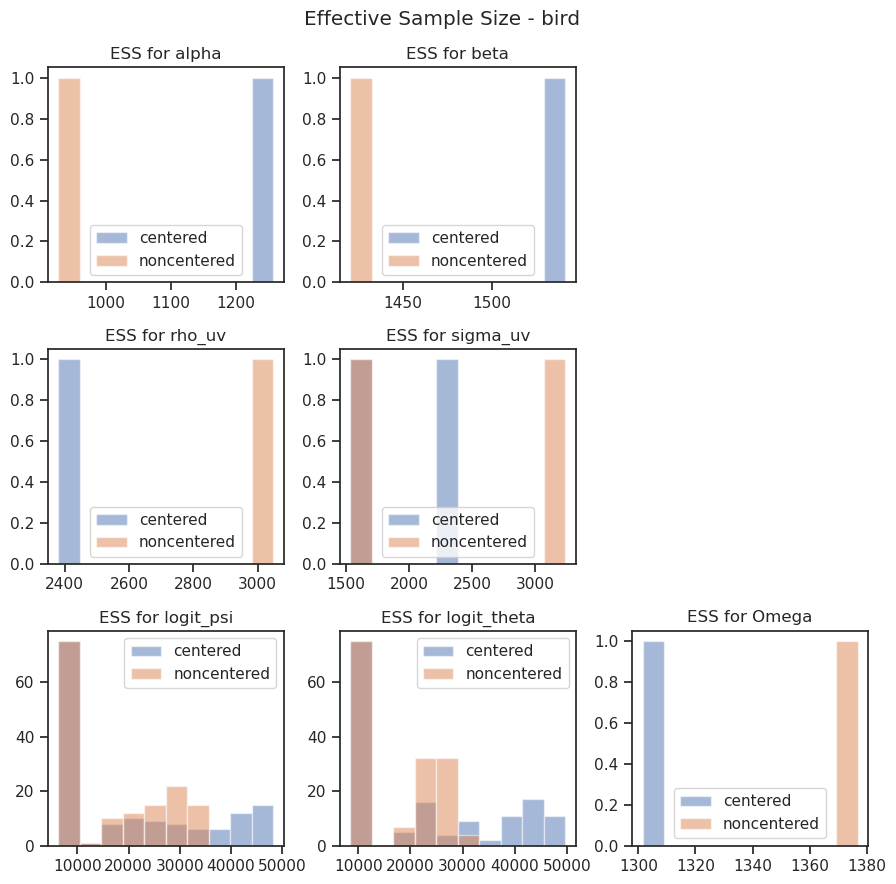

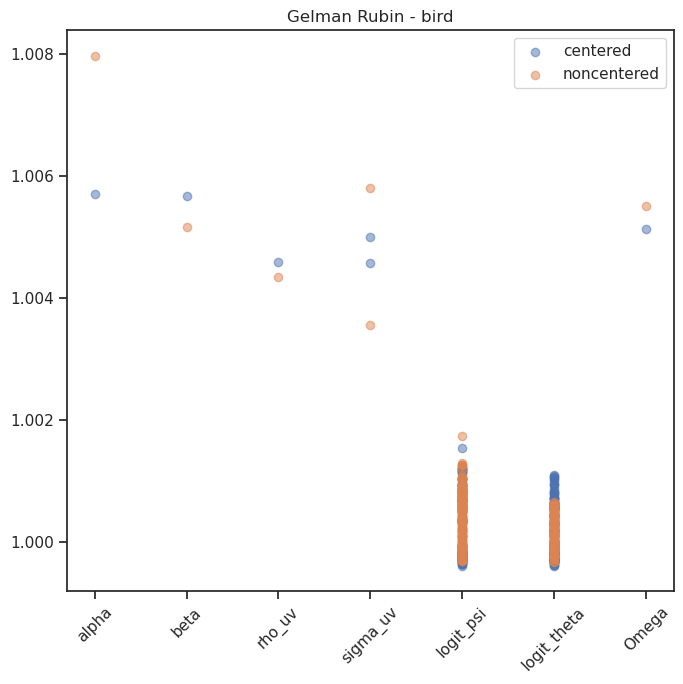

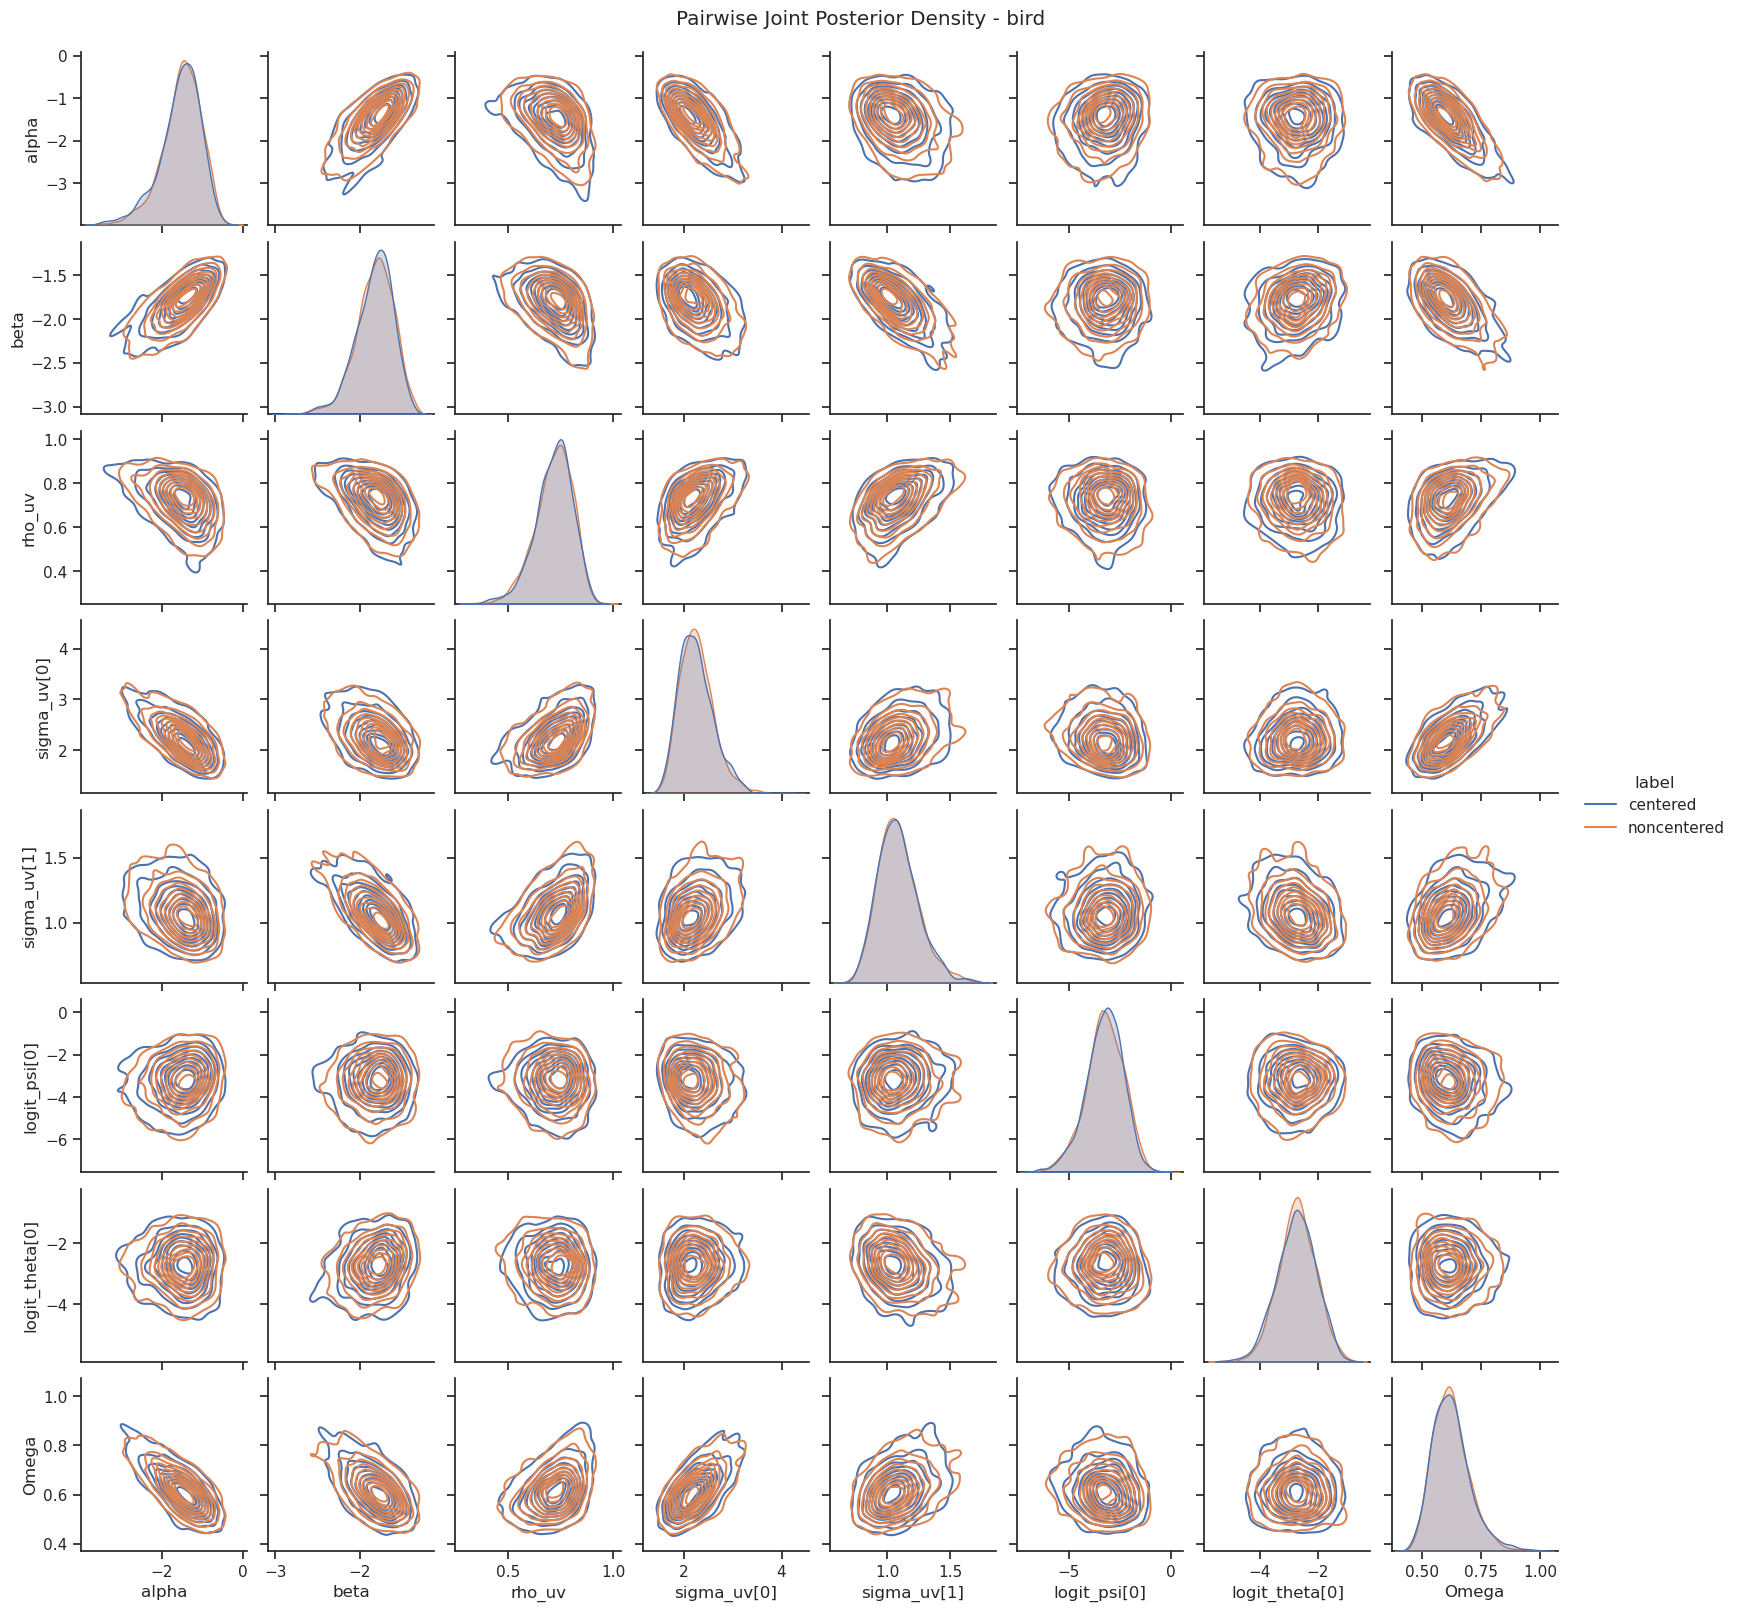

In [117]:
df_bird_centered = pd.read_csv("result/species_occupancy_bird_centered.csv")
df_bird_noncentered = pd.read_csv("result/species_occupancy_bird_noncentered.csv")
dfs = [df_bird_centered, df_bird_noncentered]
labels = ["centered", "noncentered"]

plot_ESS(dfs, labels,
         params=[["alpha", "beta"], ["rho_uv", "sigma_uv"], ["logit_psi", "logit_theta", "Omega"]],
         num_chains=num_chains, num_samples=num_samples,
         title="Effective Sample Size - bird")

plot_GR(dfs, labels,
        params=["alpha", "beta", "rho_uv", "sigma_uv", "logit_psi", "logit_theta", "Omega"],
        num_chains=num_chains, num_samples=num_samples,
        title="Gelman Rubin - bird")

plot_posterior(dfs, labels,
               params=["alpha", "beta", "rho_uv", "sigma_uv[0]", "sigma_uv[1]", "logit_psi[0]", "logit_theta[0]", "Omega"],
               num_subsamples=1000,
               title="Pairwise Joint Posterior Density - bird")

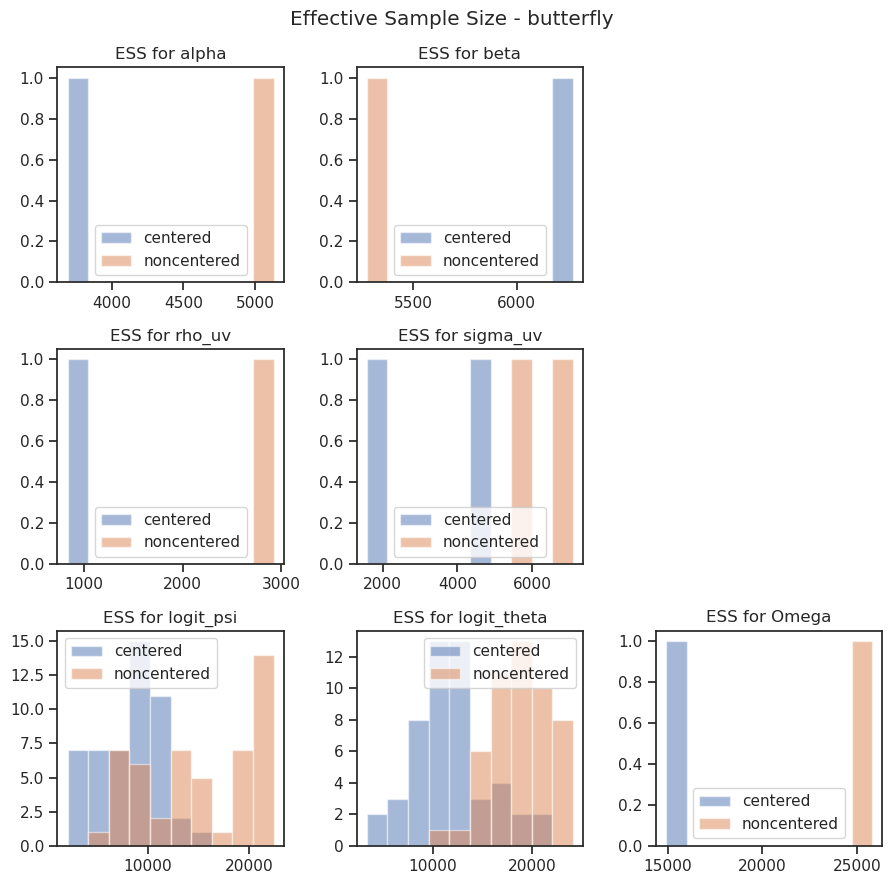

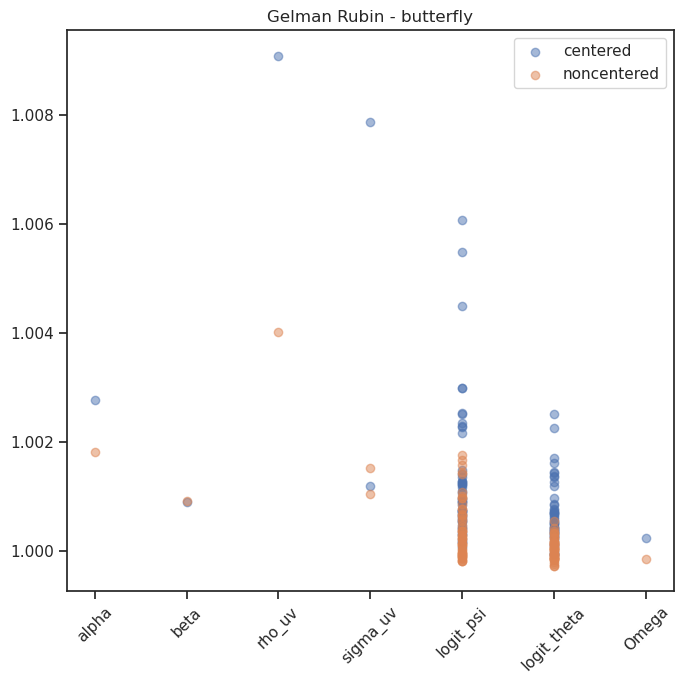

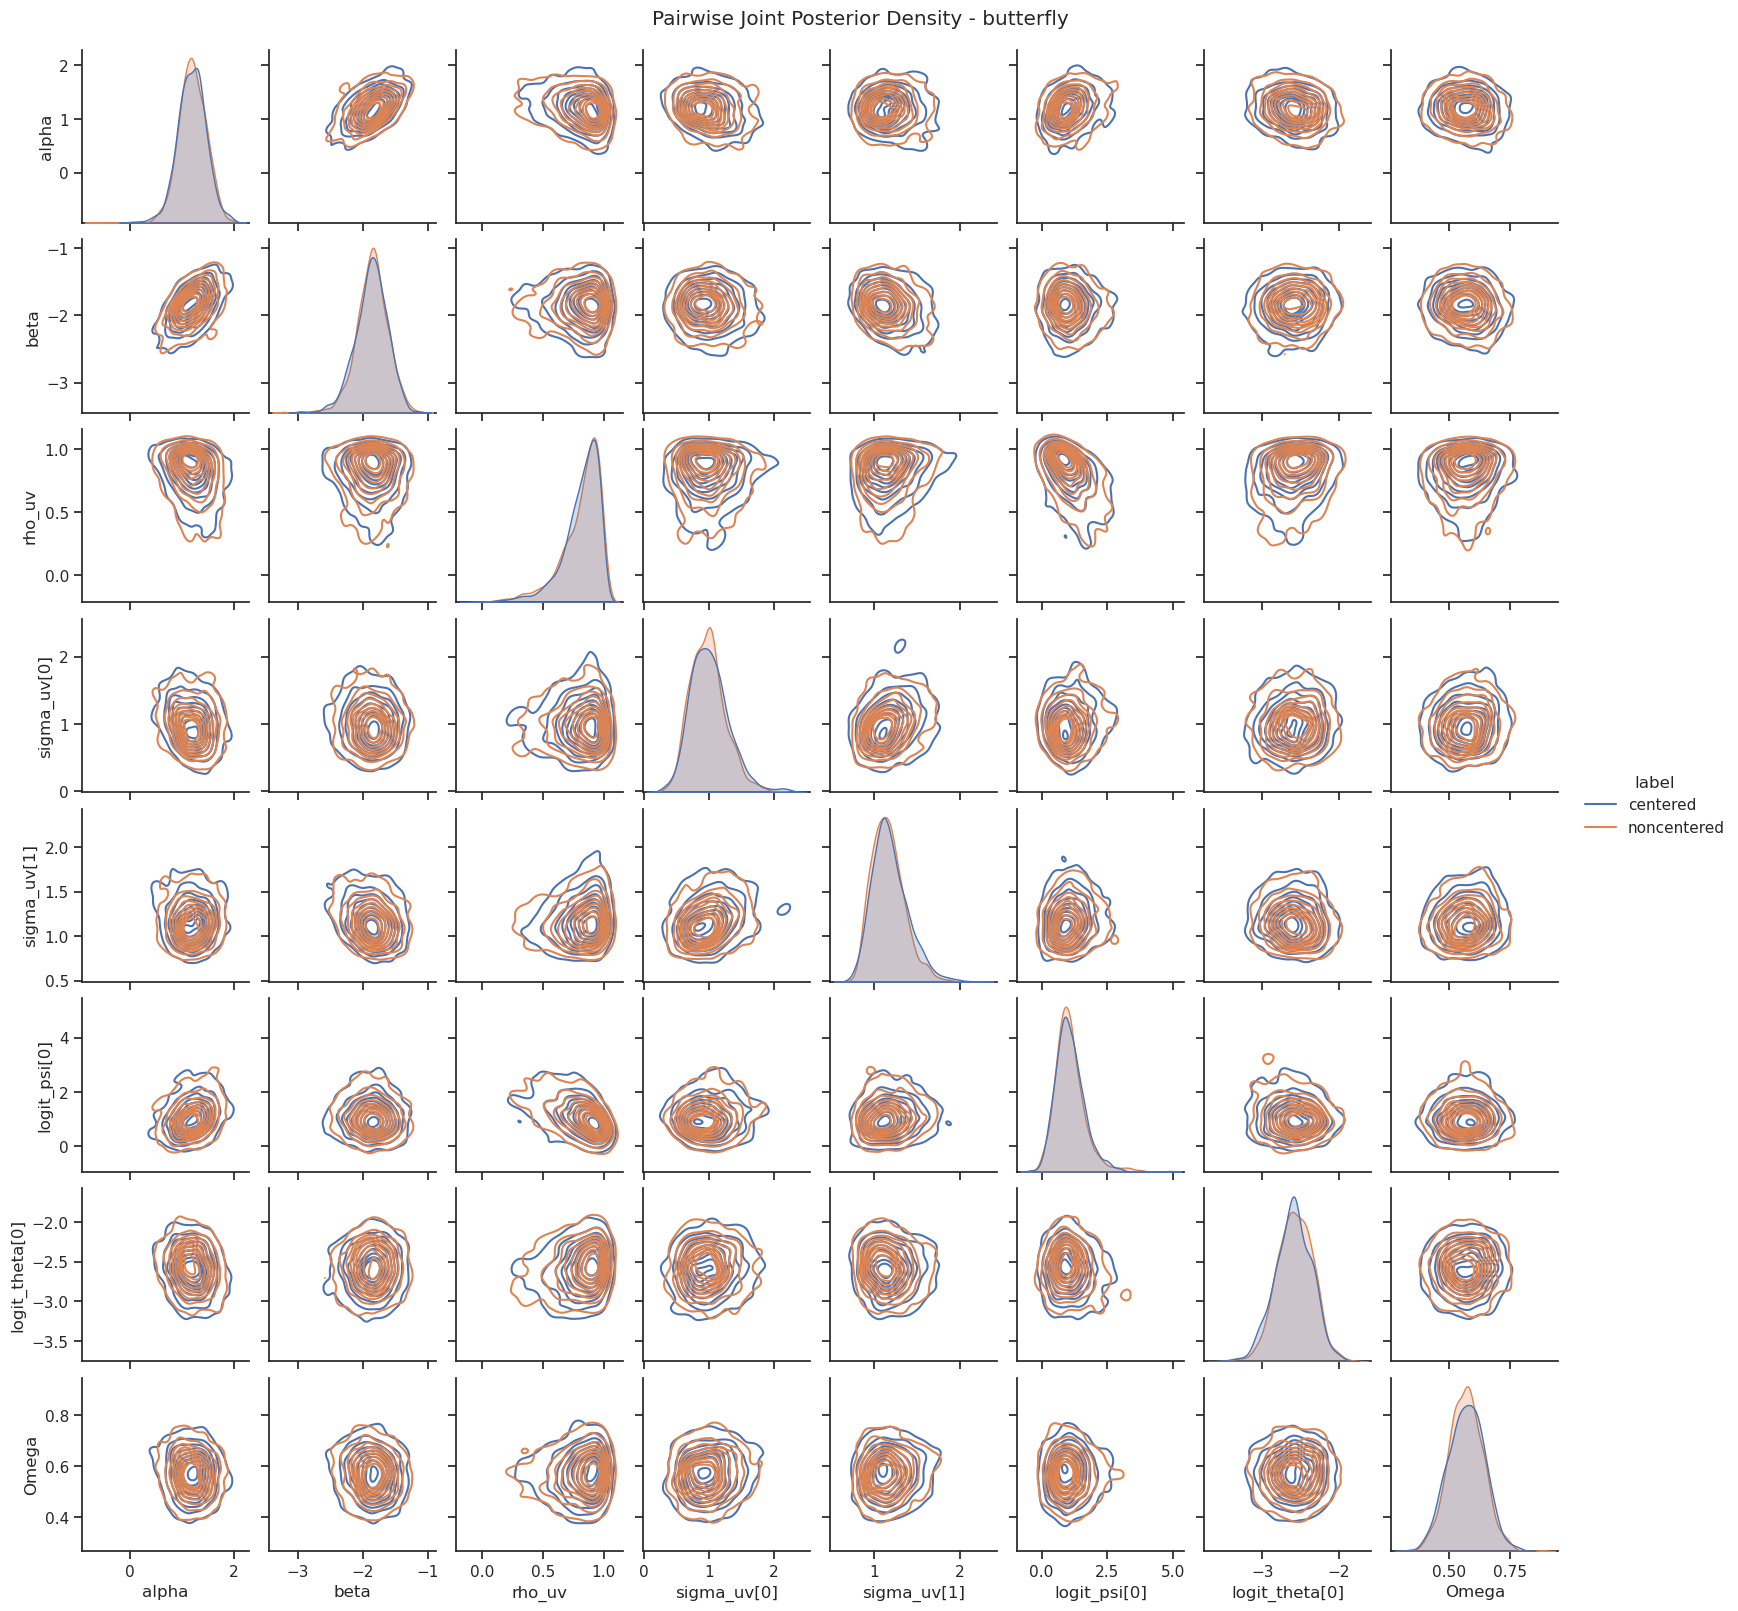

In [118]:
df_butterfly_centered = pd.read_csv("result/species_occupancy_butterfly_centered.csv")
df_butterfly_noncentered = pd.read_csv("result/species_occupancy_butterfly_noncentered.csv")
dfs = [df_butterfly_centered, df_butterfly_noncentered]
labels = ["centered", "noncentered"]

plot_ESS(dfs, labels,
         params=[["alpha", "beta"], ["rho_uv", "sigma_uv"], ["logit_psi", "logit_theta", "Omega"]],
         num_chains=num_chains, num_samples=num_samples,
         title="Effective Sample Size - butterfly")

plot_GR(dfs, labels,
        params=["alpha", "beta", "rho_uv", "sigma_uv", "logit_psi", "logit_theta", "Omega"],
        num_chains=num_chains, num_samples=num_samples,
        title="Gelman Rubin - butterfly")

plot_posterior(dfs, labels,
               params=["alpha", "beta", "rho_uv", "sigma_uv[0]", "sigma_uv[1]", "logit_psi[0]", "logit_theta[0]", "Omega"],
               num_subsamples=1000,
               title="Pairwise Joint Posterior Density - butterfly")